# _`automaton`_ & _`aut`_

The (accessible part of the) "conjunction" of automata.

Also Known As:
- synchronized product
- Hadamard product
- intersection

Preconditions:
- all the labelsets are letterized

See also:
- [_automaton_.infiltrate](automaton.infiltrate.ipynb)
- [_automaton_.shuffle](automaton.shuffle.ipynb)
- [_expression_.conjunction](expression.conjunction.ipynb)
- [_polynomial_.conjunction](polynomial.conjunction.ipynb)
- [_automaton_.insplit](automaton.insplit.ipynb)

## Examples

### Boolean Automata

In [1]:
import vcsn

The synchronized product of Boolean automata computes the intersection of their languages.  For instance, the conjunction of an automaton that accepts only words on $\{a, b\}$ with an odd number of $a$ with an automaton accepting with words with an odd number of $b$:

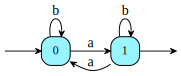

In [2]:
%%automaton odda
$ -> 0
0 -> 0 b
0 -> 1 a
1 -> 1 b
1 -> 0 a
1 -> $

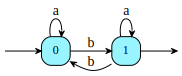

In [3]:
%%automaton oddb
$ -> 0
0 -> 0 a
0 -> 1 b
1 -> 1 a
1 -> 0 b
1 -> $

is an automaton that accepts only words with odd numbers of $a$ _and_ $b$:

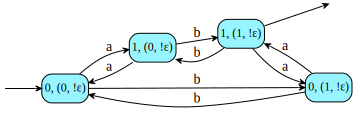

In [4]:
odda & oddb

In [5]:
(odda & oddb).shortest(10)

ab + ba + aaab + aaba + abaa + abbb + baaa + babb + bbab + bbba

### Weighted automata

In [6]:
import vcsn
c = vcsn.context('[...] -> seriesset<[...] -> Z>')
std = lambda exp: c.expression(exp).standard()

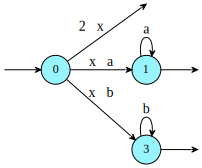

In [7]:
x = std("<x>a*+<x>b*"); x

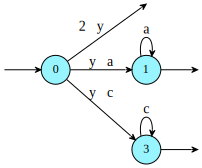

In [8]:
y = std("<y>a*+<y>c*"); y

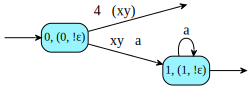

In [9]:
x & y

### Associativity
This operator is associative, and it is actually implemented as a variadic operator; `a & b & c` is not exactly the same as `(a&b)&c`: they are the same automata, but the former is labeled with 3-uples, not 2-uples.

In [10]:
x = std('<x>a')
y = std('<y>a')
z = std('<z>a')

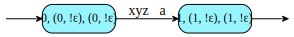

In [11]:
x & y & z

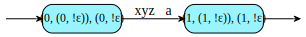

In [12]:
xy = (x & y).__value__(); xy & z

The `__value__` call here is an internal detail used to force Vcsn into the binary call.  You should forget about it.